https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive' )
df = pd.read_csv('vehicles.csv')
print( df.shape )

Mounted at /content/drive
(426880, 26)


In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=3, suppress=True)

# **Displaying Data**

In [ ]:
print(f"Dataset shape: {df.shape}\n")

missing_values = df.isnull().sum()
print(missing_values, "\n")

total_missing = missing_values.sum()
print("**Total Missing**\n", total_missing, "\n")

total_cells = np.product(df.shape)
print("**Total Cells**\n", total_cells, "\n")

percentage_missing = (total_missing/total_cells) * 100
print("**Percentage Missing**\n", percentage_missing)

missing_column_percentages = df.isnull().mean() * 100
print("\n**Missing Column Percentages**\n", missing_column_percentages)


Dataset shape: (426880, 26)

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64 

**Total Missing**
 1655336 

**Total Cells**
 11098880 

**Percentage Missing**
 14.914441817552762

**Missing Column Percentages**
 id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition

# **Feature Selection**

In [ ]:
items_to_remove = ['long', 'lat', 'VIN', 'county', 'size']

print(items_to_remove)
df_selection = df.drop(items_to_remove, axis=1)
print(df_selection.shape)

missing_selection = df_selection.isnull().mean() * 100
print(missing_selection)

['long', 'lat', 'VIN', 'county', 'size']
(426880, 21)
id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
image_url        0.015930
description      0.016398
state            0.000000
posting_date     0.015930
dtype: float64


# **Handling Nulls**

In [ ]:
print(df_selection.isnull().sum())

#Fill in missing odometer values with the average odometer value based on vehicle year
if 'odometer' in  df_selection.columns and pd.isna(df_selection['odometer']).any():
  missing_odometer = pd.isna(df_selection['odometer'])

  for i in df_selection[missing_odometer & ~pd.isna(df_selection['year'])].index:
    car_year = df_selection.loc[i, 'year']
    average_odometer = df_selection[df_selection['year'] == car_year]['odometer'].mean()
  df_selection['odometer'] = df_selection['odometer'].fillna(average_odometer)
  df_selection['odometer'] = df_selection['odometer'].astype(int)

print(df_selection.isnull().sum())
print(df_selection['odometer'].head())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
image_url           68
description         70
state                0
posting_date        68
dtype: int64
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer             0
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
image_url           68
description         70
state                0
posting_date        68
dtype: int64
0    156

In [ ]:
#Fill in missing year values with the average year value based on vehicle mileage

if 'year' in  df_selection.columns and pd.isna(df_selection['year']).any():
  missing_year = pd.isna(df_selection['year'])

  for i in df_selection[missing_year & ~pd.isna(df_selection['odometer'])].index:
    car_odo = df_selection.loc[i, 'odometer']

    odo_range = 20000
    odo_lower = max(0, car_odo - odo_range)
    odo_upper = car_odo + odo_range

    similar_car = df_selection[
      (df_selection['odometer'] >= odo_lower) &
      (df_selection['odometer'] <= odo_upper) &
      ~pd.isna(df_selection['year'])
    ]

    if len(similar_car) < 5:
      odo_lower = max(0, car_odo - (2 * odo_range))
      odo_upper = car_odo + (2 * odo_range)

      similar_car = df_selection[
        (df_selection['odometer'] >= odo_lower) &
        (df_selection['odometer'] <= odo_upper) &
        ~pd.isna(df_selection['year'])
    ]
    if len(similar_car) < 5:
      df_selection.loc[i, 'year'] = df_selection['year'].median()
    else:
      df_selection.loc[i, 'year'] = (similar_car['year'].mean()).astype(int)

  missing_vals = pd.isna(df_selection['year']).sum()
  if missing_vals > 0:
    average_year = df_selection['year'].mean()
    df_selection['year'] = df_selection['year'].fillna(average_year)
    df_selection['year'] = df_selection['year'].astype(int)



print(df_selection.isnull().sum())
print(df_selection['year'].head(35))

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer             0
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
image_url           68
description         70
state                0
posting_date        68
dtype: int64
0     2008.0
1     2008.0
2     2008.0
3     2008.0
4     2008.0
5     2008.0
6     2008.0
7     2008.0
8     2008.0
9     2008.0
10    2008.0
11    2008.0
12    2008.0
13    2008.0
14    2008.0
15    2008.0
16    2008.0
17    2008.0
18    2008.0
19    2008.0
20    2008.0
21    2008.0
22    2008.0
23    2008.0
24    2008.0
25    2008.0
26    2008.0
27    2014.0
28    2010.0
29    2020.0
30    2017.0
31    2013.0
32    2012.0
33    2016.0
34    2019.0
Name: year, dtype: float64


In [ ]:
for col in df_selection.columns:
  df_selection[col] = df_selection[col].fillna('unknown')

print(df_selection.isnull().sum())
print(df_selection.head(40))

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
image_url       0
description     0
state           0
posting_date    0
dtype: int64
            id                                                url  \
0   7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1   7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2   7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3   7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4   7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5   7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6   7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7   7220195662  https://hudsonvalley.craigslist.org/cto/d

In [ ]:
print(df_selection['odometer'])

0         156289
1         156289
2         156289
3         156289
4         156289
           ...  
426875     32226
426876     12029
426877      4174
426878     30112
426879     22716
Name: odometer, Length: 426880, dtype: int64


# **Outliers**

In [ ]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
#Remove outliers from Odometer
print('Odometer Outliers\n')
og_size = len(df_selection)
print(f"Original size: {og_size}")
df_selection = remove_outliers(df_selection, 'odometer')
print(df_selection.shape)
odo_removed = og_size - len(df_selection)
print(f"Total removed: {odo_removed}\n")

#Remove outliers from price
print('Price Outliers\n')
og_size = len(df_selection)
print(f"Original size: {og_size}")
df_selection = remove_outliers(df_selection, 'price')
print(df_selection.shape)
price_removed = og_size - len(df_selection)
print(f"Total removed: {price_removed}\n")

Odometer Outliers

Original size: 426880
(422763, 21)
Total removed: 4117

Price Outliers

Original size: 422763
(414710, 21)
Total removed: 8053



In [ ]:
#Remove outliers from year
from datetime import datetime
current_year = datetime.now().year
df_selection = df_selection[(df_selection['year'] >= 1980 ) & (df_selection['year'] <= current_year +1)]
print(f"Removed {og_size - len(df_selection)} odometer outliers")





Removed 15815 odometer outliers


# **Feature Transformation**

In [ ]:
#Converting dates to date time
if 'posting_date' in df_selection.columns:
  df_selection = df_selection[df_selection['posting_date'] != 'unknown']
  df_selection['posting_date'] = pd.to_datetime(df_selection['posting_date'])

<ipython-input-13-f9e6d075831e>:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_selection['posting_date'] = pd.to_datetime(df_selection['posting_date'])


In [ ]:
print(df_selection['posting_date'].head(50))

27    2021-05-04 12:31:18-05:00
28    2021-05-04 12:31:08-05:00
29    2021-05-04 12:31:25-05:00
30    2021-05-04 10:41:31-05:00
31    2021-05-03 14:02:03-05:00
32    2021-05-03 13:41:25-05:00
33    2021-05-03 12:41:33-05:00
34    2021-05-03 12:12:59-05:00
35    2021-05-03 11:31:14-05:00
36    2021-05-03 07:50:35-05:00
37    2021-05-03 07:38:05-05:00
38    2021-05-02 12:22:10-05:00
39    2021-05-02 10:51:08-05:00
40    2021-05-02 10:21:33-05:00
41    2021-05-02 08:44:35-05:00
42    2021-05-01 12:21:51-05:00
43    2021-05-01 09:21:37-05:00
44    2021-05-01 09:21:34-05:00
45    2021-05-01 09:11:35-05:00
46    2021-04-30 16:35:11-05:00
47    2021-04-30 12:51:31-05:00
48    2021-04-30 11:21:17-05:00
49    2021-04-30 10:11:01-05:00
50    2021-04-30 10:11:00-05:00
51    2021-04-29 18:11:08-05:00
52    2021-04-29 18:11:10-05:00
53    2021-04-29 18:11:11-05:00
54    2021-04-29 18:11:08-05:00
55    2021-04-29 17:19:18-05:00
56    2021-04-28 11:01:17-05:00
57    2021-04-28 11:01:11-05:00
58    20

# **Normalization**

        price
0  243.454474
1  203.134000
2  262.394496
3  234.671389
4  168.446132


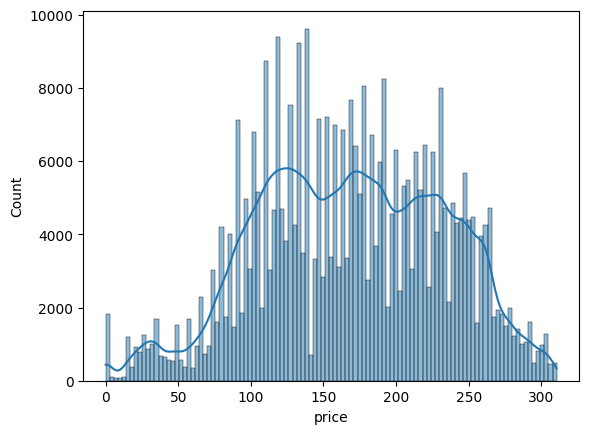

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

positive_prices = df_selection[df_selection['price'] > 0] #Confirm all prices are positive
normalized_price = pd.DataFrame(stats.boxcox(positive_prices['price'])[0], columns=['price'])
print(normalized_price.head())

ax = sns.histplot(normalized_price, x='price', kde=True)
plt.show()



# **Feature creation**

In [ ]:
# Get car age from car year

if 'year' in df_selection.columns:
  df_selection['car_age'] = current_year - df_selection['year']
  #df_selection['car_age'] = df_selection['car_age'].astype(int)
print(df_selection['car_age'].head())
print(df_selection.head())

27        11.0
28        15.0
29         5.0
30         8.0
31        12.0
          ... 
426875     6.0
426876     5.0
426877     5.0
426878     7.0
426879     6.0
Name: car_age, Length: 406880, dtype: float64
                id                                                url   region                      region_url  price    year manufacturer                     model  condition    cylinders    fuel  odometer title_status transmission    drive       type paint_color                                          image_url                                        description state               posting_date  car_age
27      7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...   auburn   https://auburn.craigslist.org  33590  2014.0          gmc  sierra 1500 crew cab slt       good  8 cylinders     gas     57923        clean        other  unknown     pickup       white  https://images.craigslist.org/00R0R_lwWjXSEWNa...  Carvana is the safer way to buy a car During t...    al  2021-0

# **Check List**
* Feature selection
* Outlier removal
* Appropriate handling of nulls
* Some form of feature transformation
* Normalization
* Feature creation

